<a href="https://colab.research.google.com/github/Mohamed7221/BMLogin/blob/master/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def GetValuesCounts(data):
    import pandas as pd
    columns = [col for col in data.columns ]

    for col in columns:
        print(data[col].value_counts(),"\n")

In [3]:
def GetObjectFeatures(data) :
    object_columns = [col for col in data.columns if data[col].dtype == 'object']

    for col in object_columns :
        print(data[col].value_counts(),"\n")

In [4]:
def PBP (data):
    for col in data.select_dtypes(include=['int', 'float']).columns:
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.set_title(f'Boxplot of {col}')
        bp=data.boxplot(column=col)
        plt.show()
        plt.close(fig)

In [5]:
def TribleP(data):
    columns = [col for col in data.columns]
    custom_palette = sns.color_palette("coolwarm", 6)

    for col in columns:
        if data[col].value_counts().count() <= 6:
            sns.pairplot(data, hue=col, palette=custom_palette)
            plt.show()
        else:
            continue

In [6]:
def PDP(data):
    columns = [col for col in data.columns]
    colors = sns.color_palette("coolwarm", len(columns))

    for i, col in enumerate(data.select_dtypes(include=['int', 'float']).columns):
        if data[col].value_counts().count() <= 10000:
            sns.histplot(data[col], kde=True, bins=15, color=colors[i % len(colors)])
            plt.title(f'Distribution of {col}')
            plt.show()

In [7]:
def PlotPie(data):
    custom_palette = "coolwarm"
    sns.set_palette(custom_palette)


    plt.figure(figsize=(8, 6))

    columns = [col for col in data.columns]

    for col in columns:
        if data[col].value_counts().count() <= 10:
            # Plot pie chart
            plt.figure(figsize=(8,6))
            data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
            plt.title(f"Distribution of {col}")
            plt.ylabel("")
            plt.axis('equal')
            plt.show()
            print("\n\n\n")

In [8]:
# Load the dataset
file_path = '/content/Expense vs Rev v1(Sheet1).csv'  # Change this to your actual file path if needed
data = pd.read_csv(file_path) # This line loads your data into a pandas dataframe called 'data'



In [9]:
print(data.shape)


(6597, 10)


In [10]:
data.head()


,Description,Account Type,Period Name,Accounting Year,Entered Beginning Balance,Entered Period Net Activity,Entered Quarter to Date,Entered Year to Date,Balance Type,Balance Subtype
0,Accidents Claims,Expense,13_Dec-20,2020,"126,020","-126,020","-126,020",0,Actual,Actual
1,Advertisments,Expense,13_Dec-20,2020,"261,763.58","-261,763.58","-148,782.86",0,Actual,Actual
2,Average Cost Adjustment (Gain/Loss),Expense,13_Dec-20,2020,"-516,488.34","516,488.34",938.86,0,Actual,Actual
3,Back Charges - Subcontractors,Expense,13_Dec-20,2020,"-3,345.13","3,345.13","1,600.91",0,Actual,Actual
4,Bank Charges,Expense,13_Dec-20,2020,"1,008,258.45","-1,008,258.45","-127,751.62",0,Actual,Actual


In [11]:
data.tail()


,Description,Account Type,Period Name,Accounting Year,Entered Beginning Balance,Entered Period Net Activity,Entered Quarter to Date,Entered Year to Date,Balance Type,Balance Subtype
6592,Rounding Revenue,Revenue,24-Sep,2024,0,0,0,0,Actual,Actual
6593,Trade Commercial Sales Revenue,Revenue,24-Sep,2024,"-26,092,812.31","-1,211,756.97","-9,441,204.95","-27,304,569.28",Actual,Actual
6594,Unapplied Receipt,Revenue,24-Sep,2024,"-137,342,435.02","8,166,802.86","2,174,199.86","-129,175,632.16",Actual,Actual
6595,Unearned Discount,Revenue,24-Sep,2024,"24,212.50",0,0,"24,212.50",Actual,Actual
6596,Unidentified Receipt,Revenue,24-Sep,2024,"-57,926,986.14","-6,414,443.93","-6,572,798.55","-64,341,430.07",Actual,Actual


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6597 entries, 0 to 6596
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Description                  6597 non-null   object
 1   Account Type                 6597 non-null   object
 2   Period Name                  6597 non-null   object
 3   Accounting Year              6597 non-null   int64 
 4   Entered Beginning Balance    6597 non-null   object
 5   Entered Period Net Activity  6597 non-null   object
 6   Entered Quarter to Date      6597 non-null   object
 7   Entered Year to Date         6597 non-null   object
 8   Balance Type                 6597 non-null   object
 9   Balance Subtype              6597 non-null   object
dtypes: int64(1), object(9)
memory usage: 515.5+ KB


In [13]:
data.columns


Index(['Description', 'Account Type', 'Period Name', 'Accounting Year',
       'Entered Beginning Balance', 'Entered Period Net Activity',
       'Entered Quarter to Date', 'Entered Year to Date', 'Balance Type',
       'Balance Subtype'],
      dtype='object')

In [14]:
data.describe()


,Accounting Year
count,6597.000000
mean,2022.231166
std,1.260521
min,2020.000000
25%,2021.000000
50%,2022.000000
75%,2023.000000
max,2024.000000


In [15]:
data.shape


(6597, 10)

In [16]:
NumiricalColumns = ['Accounting Year',
                   'Entered Beginning Balance',
                   'Entered Period Net Activity',
                   'Entered Quarter to Date',
                   'Entered Year to Date']

# Now, iterate through the corrected list of numerical columns to calculate the variance.
for col in NumiricalColumns:
    # Convert the column to numeric, handling commas and errors
    # Convert the column to string type first to handle potential commas
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', ''), errors='coerce')

    print("Variance for", col, "column :", data[col].var())

Variance for Accounting Year column : 1.5889133317027764
Variance for Entered Beginning Balance column : 2.2580779790801856e+16
Variance for Entered Period Net Activity column : 3525212195850664.0
Variance for Entered Quarter to Date column : 4898910263431150.0
Variance for Entered Year to Date column : 2.6683852658662104e+16


In [17]:
for col1 in NumiricalColumns :
    for col2 in NumiricalColumns :
        if (col1==col2):
            continue
        else:
            print("Correlation for",col1,"column with",col2,"column :",data[col].corr(data[col2]))

Correlation for Accounting Year column with Entered Beginning Balance column : 0.9316803271243755
Correlation for Accounting Year column with Entered Period Net Activity column : 0.39326022138306455
Correlation for Accounting Year column with Entered Quarter to Date column : 0.7463028168977277
Correlation for Accounting Year column with Entered Year to Date column : 0.9999999999999998
Correlation for Entered Beginning Balance column with Accounting Year column : -0.004472579313439995
Correlation for Entered Beginning Balance column with Entered Period Net Activity column : 0.39326022138306455
Correlation for Entered Beginning Balance column with Entered Quarter to Date column : 0.7463028168977277
Correlation for Entered Beginning Balance column with Entered Year to Date column : 0.9999999999999998
Correlation for Entered Period Net Activity column with Accounting Year column : -0.004472579313439995
Correlation for Entered Period Net Activity column with Entered Beginning Balance column

In [18]:
for col in NumiricalColumns:
    print("Skewness for", col, "column:", data[col].skew())

Skewness for Accounting Year column: -0.143461063640686
Skewness for Entered Beginning Balance column: -8.15092689696868
Skewness for Entered Period Net Activity column: 8.663655486810548
Skewness for Entered Quarter to Date column: -4.210347506885058
Skewness for Entered Year to Date column: -8.217484047138683


In [19]:
data.isna().sum()


,0
Description,0
Account Type,0
Period Name,0
Accounting Year,0
Entered Beginning Balance,0
Entered Period Net Activity,0
Entered Quarter to Date,0
Entered Year to Date,0
Balance Type,0
Balance Subtype,0


In [20]:
data.duplicated().sum()


10

In [21]:
GetValuesCounts(data)


Description
Material                                112
Labor                                   112
Loan Interest Charges                    72
Other expenses                           56
Repairs                                  56
                                       ... 
Traffic Fines                            26
Internal Services (Production units)     25
Social Security Adjustments              25
Revaluation Reserve Retired (Loss)       12
Unearned Discount                         7
Name: count, Length: 126, dtype: int64 

Account Type
Expense    5380
Revenue    1217
Name: count, dtype: int64 

Period Name
24-Sep       130
24-Jun       130
24-Apr       130
24-Jul       130
24-Aug       130
24-May       130
24-Oct       130
24-Mar       129
24-Jan       129
24-Feb       129
13_Dec-23    128
23-Dec       128
23-Sep       127
23-Oct       127
23-Nov       127
23-Aug       127
13_Dec-22    126
23-Apr       126
22-Dec       126
23-Mar       126
23-Feb       126
23-Jan       126
23-J

In [22]:
GetObjectFeatures(data)


Description
Material                                112
Labor                                   112
Loan Interest Charges                    72
Other expenses                           56
Repairs                                  56
                                       ... 
Traffic Fines                            26
Internal Services (Production units)     25
Social Security Adjustments              25
Revaluation Reserve Retired (Loss)       12
Unearned Discount                         7
Name: count, Length: 126, dtype: int64 

Account Type
Expense    5380
Revenue    1217
Name: count, dtype: int64 

Period Name
24-Sep       130
24-Jun       130
24-Apr       130
24-Jul       130
24-Aug       130
24-May       130
24-Oct       130
24-Mar       129
24-Jan       129
24-Feb       129
13_Dec-23    128
23-Dec       128
23-Sep       127
23-Oct       127
23-Nov       127
23-Aug       127
13_Dec-22    126
23-Apr       126
22-Dec       126
23-Mar       126
23-Feb       126
23-Jan       126
23-J

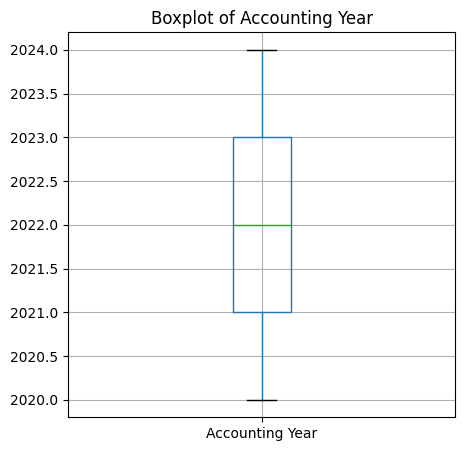

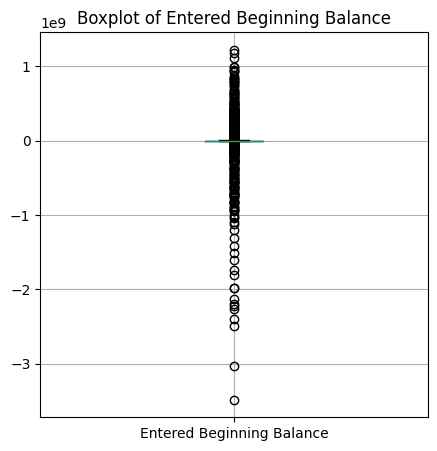

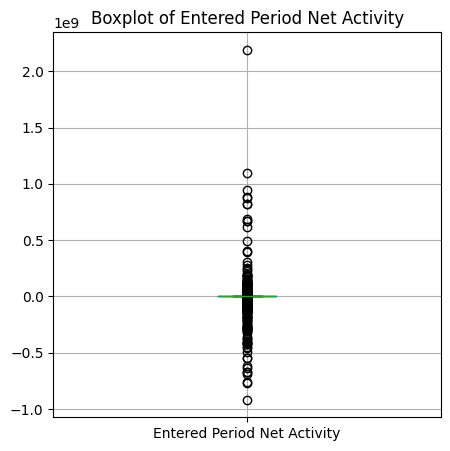

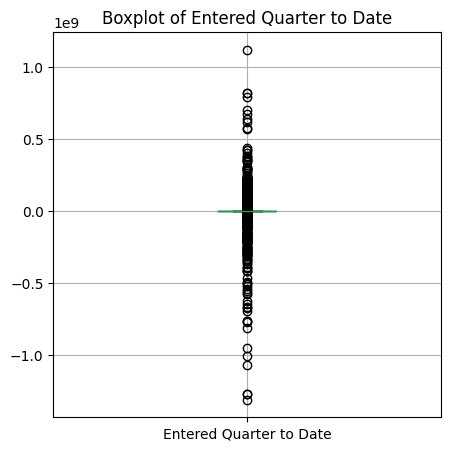

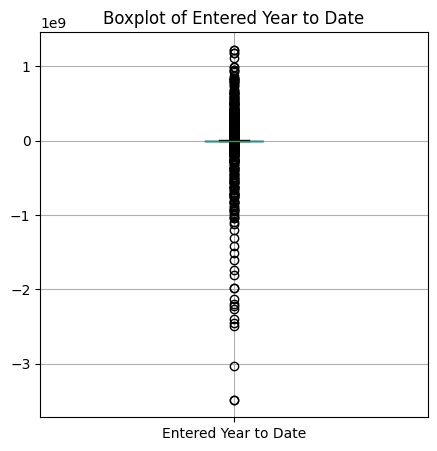

In [23]:
PBP(data)


<Figure size 800x600 with 0 Axes>

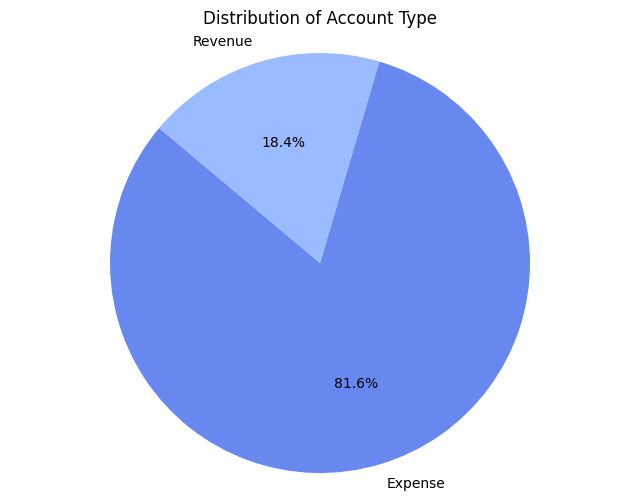

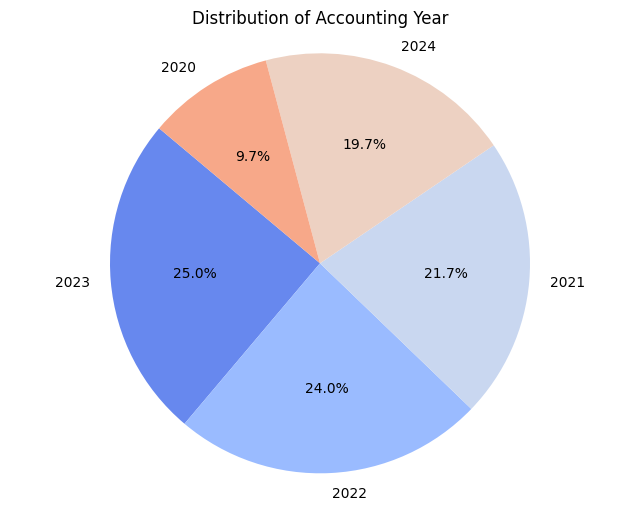

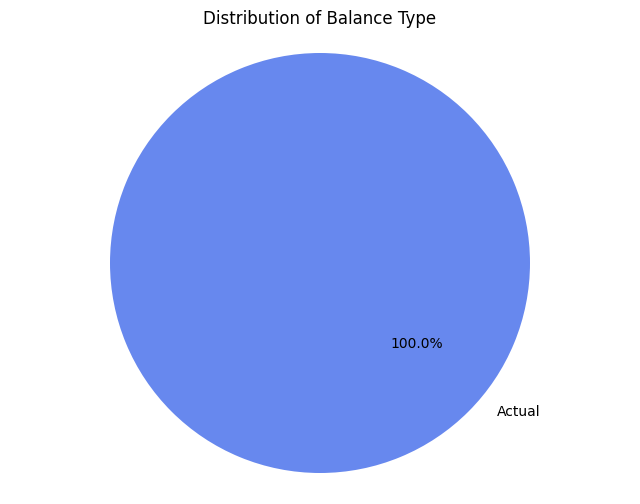

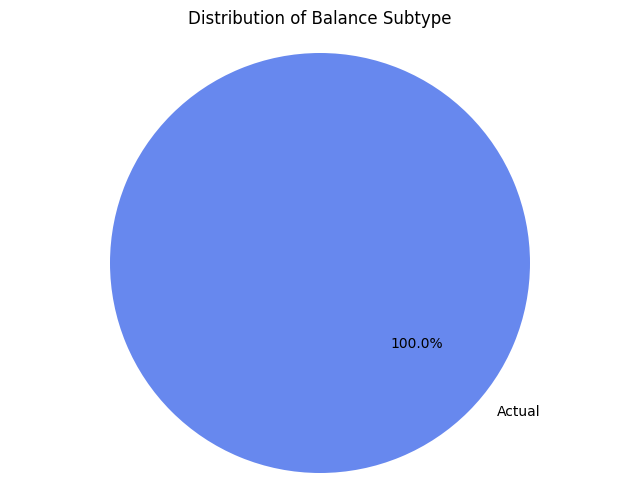

In [24]:
PlotPie(data)


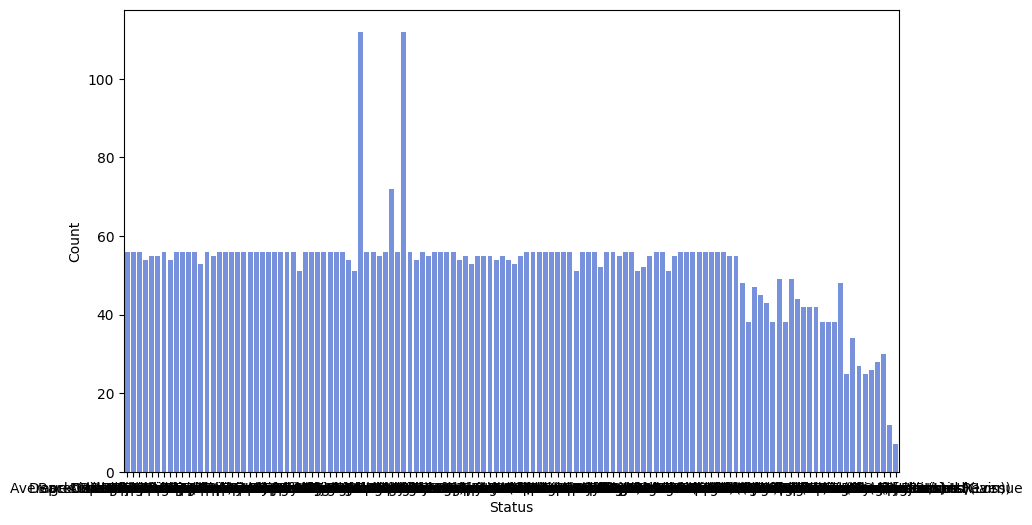

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Description', data=data)
plt.title('')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [26]:
count_of_ones = data['Description'].value_counts()[1]
print(f"Number of 1s in Description column: {count_of_ones}")

Number of 1s in Description column: 112


In [27]:
count_of_ones = data['Description'].value_counts()[0]
print(f"Number of 0s in Description column: {count_of_ones}")

Number of 0s in Description column: 112


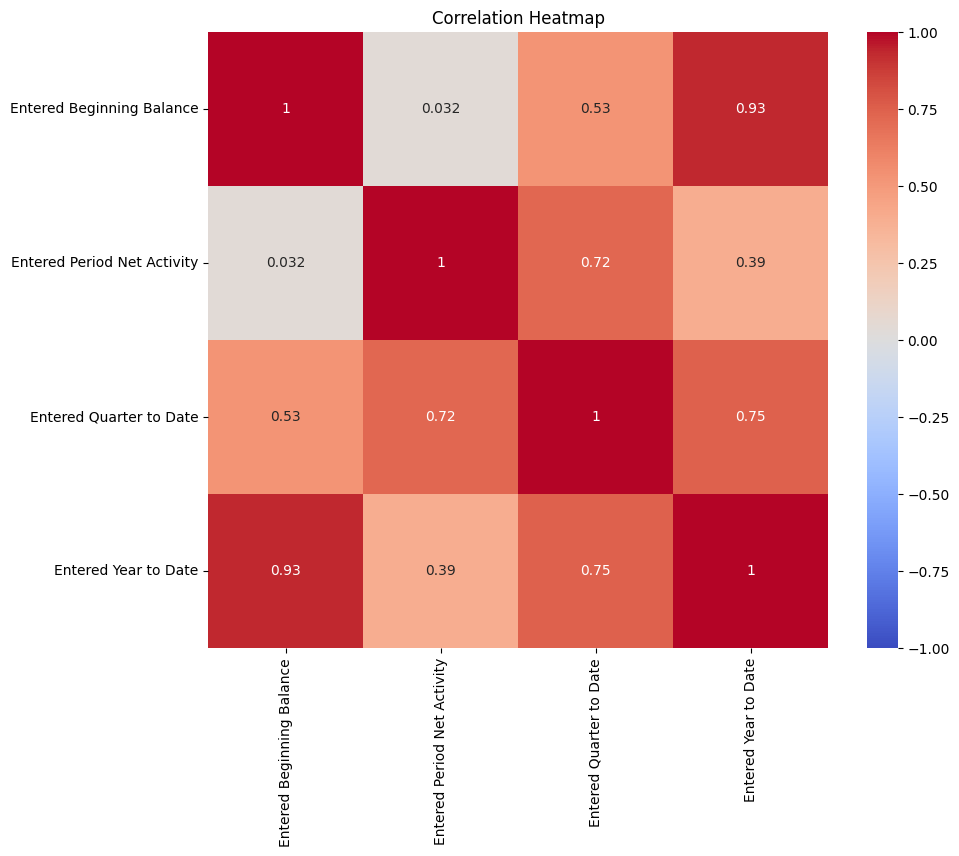

In [28]:
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation analysis
numerical_features = ['Entered Beginning Balance', 'Entered Period Net Activity',
                      'Entered Quarter to Date', 'Entered Year to Date']
correlation_matrix = data[numerical_features].astype(float).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
cols_to_drop = [
       'Account Type', 'Period Name', 'Accounting Year',
       'Entered Beginning Balance','Entered Quarter to Date',
       'Entered Year to Date', 'Balance Type','Balance Subtype'
]

In [30]:
# Drop irrelevant columns
df_cleaned = data.drop(columns=cols_to_drop)

# Checking remaining columns to confirm
print(df_cleaned.columns)

Index(['Description', 'Entered Period Net Activity'], dtype='object')


In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to label encode
categorical_cols = [
    'Description', 'Entered Period Net Activity'
]

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Checking the new dataframe
print(df_cleaned.head())

   Description  Entered Period Net Activity
0            1                          866
1            3                          771
2            4                         2906
3            5                         1484
4            6                          582


In [32]:
df_cleaned.head()


,Description,Entered Period Net Activity
0,1,866
1,3,771
2,4,2906
3,5,1484
4,6,582


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# List of numerical columns to apply StandardScaler
numerical_cols = ['Entered Period Net Activity']  # Add other numerical columns if necessary, e.g.

# Apply StandardScaler to numerical columns
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

In [34]:
df_cleaned.head(20)


,Description,Entered Period Net Activity
0,1,-0.837174
1,3,-0.945049
2,4,1.479292
3,5,-0.135421
4,6,-1.159663
5,7,-0.734977
6,8,-1.190322
7,9,-0.604392
8,10,-1.373141
9,11,-1.265266


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
# Define your target variable and features
X = df_cleaned.drop('Description', axis=1)
y = df_cleaned['Entered Period Net Activity']

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from collections import Counter

from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler

# Define your target variable and features
X = df_cleaned.drop('Description', axis=1)
# Convert 'Entered Period Net Activity' to discrete classes if it's continuous
# For example, you can use pd.cut or pd.qcut to bin the values into categories
# Replace 'num_bins' with the desired number of bins
num_bins = 5  # Example: Create 5 bins/classes
y = pd.cut(df_cleaned['Entered Period Net Activity'], bins=num_bins, labels=False)

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Assuming you have a multi-class classification problem
# Get the class distribution of your target variable
class_distribution = Counter(y_train)

# Determine the desired ratio for undersampling
# For example, let's say you want to undersample the majority class to 60% of its original size
undersampling_ratio = {class_label: 0.6 for class_label in class_distribution}

# Calculate the number of samples for each class after undersampling
undersampling_strategy = {
    class_label: int(count * undersampling_ratio[class_label])
    for class_label, count in class_distribution.items()
}
print(undersampling_strategy)

# Instantiate the undersampler with the desired ratio
under = RandomUnderSampler(sampling_strategy=undersampling_strategy)

# Apply undersampling
X_train_resampled, y_train_resampled = under.fit_resample(X_train, y_train)

# Apply oversampling using SMOTE
over = SMOTEN(sampling_strategy='auto')  # Adjust sampling_strategy as needed
X_train_resampled, y_train_resampled = over.fit_resample(X_train_resampled, y_train_resampled)

print(Counter(y_train_resampled))

{3: 374, 1: 1703, 4: 362, 0: 352, 2: 373}
Counter({0: 1703, 1: 1703, 2: 1703, 3: 1703, 4: 1703})


In [38]:
# Step 2: Train and evaluate SVM
svm_model = SVC(kernel='rbf',gamma=0.01, C=10)  # You can choose 'linear', 'rbf', etc.
svm_model.fit(X_train_resampled, y_train_resampled )
svm_predictions = svm_model.predict(X_test)

In [39]:
# Evaluate SVM
print("SVM Model:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))

SVM Model:
Accuracy: 0.9628787878787879
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       162
           1       1.00      0.97      0.99       688
           2       0.89      0.84      0.86       158
           3       0.86      0.97      0.91       165
           4       0.97      1.00      0.98       147

    accuracy                           0.96      1320
   macro avg       0.94      0.96      0.95      1320
weighted avg       0.96      0.96      0.96      1320

Confusion Matrix:
 [[162   0   0   0   0]
 [  2 669  17   0   0]
 [  0   0 133  25   0]
 [  0   0   0 160   5]
 [  0   0   0   0 147]]


In [40]:
# Step 3: Train and evaluate Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

In [41]:
# Evaluate Logistic Regression
print("\nLogistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))


Logistic Regression Model:
Accuracy: 0.9863636363636363
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       162
           1       0.98      1.00      0.99       688
           2       0.99      0.92      0.96       158
           3       0.99      0.99      0.99       165
           4       1.00      0.99      1.00       147

    accuracy                           0.99      1320
   macro avg       0.99      0.98      0.98      1320
weighted avg       0.99      0.99      0.99      1320

Confusion Matrix:
 [[158   4   0   0   0]
 [  0 688   0   0   0]
 [  0  12 146   0   0]
 [  0   0   1 164   0]
 [  0   0   0   1 146]]


In [42]:
# Step 4: Train and evaluate Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_resampled, y_train_resampled)
rf_predictions = random_forest_model.predict(X_test)

In [43]:
# Evaluate Random Forest
print("\nRandom Forest Model:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Random Forest Model:
Accuracy: 0.9992424242424243
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       162
           1       1.00      1.00      1.00       688
           2       1.00      1.00      1.00       158
           3       1.00      1.00      1.00       165
           4       1.00      1.00      1.00       147

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320

Confusion Matrix:
 [[162   0   0   0   0]
 [  1 687   0   0   0]
 [  0   0 158   0   0]
 [  0   0   0 165   0]
 [  0   0   0   0 147]]


In [44]:
from xgboost import XGBClassifier
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model on training data
xgb_model.fit(X_train_resampled,  y_train_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       162
           1       1.00      0.99      0.99       688
           2       0.91      1.00      0.95       158
           3       0.98      0.93      0.96       165
           4       1.00      0.98      0.99       147

    accuracy                           0.98      1320
   macro avg       0.98      0.98      0.98      1320
weighted avg       0.98      0.98      0.98      1320

XGBoost Confusion Matrix:
 [[159   3   0   0   0]
 [  0 683   5   0   0]
 [  0   0 158   0   0]
 [  0   0  11 154   0]
 [  0   0   0   3 144]]


In [45]:
def predict_models(input_data, trained_models, model_accuracies):
    input_df = pd.DataFrame([input_data])

    # Encode categorical columns
    for col in categorical_cols:
        if col in label_encoder:
            input_df[col] = label_encoder[col].transform(input_df[col])

    # Scale numerical columns
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

    model_prediction = []
    for model_name, model in trained_models.items():
        pred = model.predict(input_df)
        model_prediction.append(pred[0])

    yes_models = [model for i, model in enumerate(trained_models.keys()) if model_prediction[i] == 1 ]
    no_models = [model for i, model in enumerate(trained_models.keys()) if model_prediction[i] == 0]
    total_yes_accuracy = sum(model_accuracies[model] for model in yes_models)

    total_no_accuracy = sum(model_accuracies[model] for model in no_models)

    if len(yes_models) ==0:
        avg_yes_accuracy = 0

    else:
        avg_yes_accuracy = total_yes_accuracy / len(yes_models)

    if len(no_models) == 0:
        avg_no_accuracy = 0

    else:
        avg_no_accuracy = total_no_accuracy / len(no_models)

    if avg_yes_accuracy > avg_no_accuracy:
        prediction = "Description: Yes "
    else:
        prediction = "Description: No "

    return prediction

In [46]:
# Assuming your data is stored in a DataFrame called 'data'
def load_data():
    """Loads and preprocesses the data.

    Returns:
        tuple: A tuple containing the feature matrix (X) and the target vector (y).
    """
    # Access the 'data' DataFrame from your environment
    data = globals()['data']

    # Assuming the target variable is 'Description'
    X = data.drop('Description', axis=1)
    y = data['Description']

    # Perform any necessary data preprocessing steps here, such as:
    # - Encoding categorical features
    # - Scaling numerical features

    return X, y

In [47]:
# Example test input
test_input = {
    'Water': 'value'  # Replace 'value' with the actual value you want for Water
}